### Section 1: Project Overview

Our project aims to analyze a Washington DC crime dataset to uncover patterns and relationships within the data. By employing advanced data analysis techniques, we intend to identify correlations and provide valuable insights into the factors influencing crime in the nation's capital. This analysis will be instrumental in understanding the dynamics of criminal activities and will serve as a foundation for developing data-driven strategies to enhance public safety.

<b> Research Questions </b>

1. Are there specific geographic hotspots for crime in Washington DC?
2. Is there a correlation between the density of alcohol outlets and crime in DC?
3. Can we predict future crime rates or hotspots based on historical data and identified patterns?
4. Does the temperature of the day have an impact on the number of crimes?
5. How do socioeconomic factors such as income levels, unemployment rates, and education levels correlate with crime rates in different areas of Washington DC?
6. Is there an association between the time of day a crime that a crime occurred and the type of crime?




<h1 style="color:SlateBlue"> At the Scene of Crime </h1>
<h2> A Comprehensive Analysis of Crime Data in Washington DC </h2>

<center><img src="https://th.bing.com/th/id/R.94efbd62bdae0595ab0eb22d046d2540?rik=fgjR%2bfAeo19Sew&riu=http%3a%2f%2flowres.cartoonstock.com%2flaw-order-crime-criminal-thief-crime_prevention-crime_victims-ktan327_low.jpg&ehk=19rEsDm60mbLFW3%2bm9bf6CgWHPrKis6VYWMV8XOVmdY%3d&risl=&pid=ImgRaw&r=0" alt="Girl in a jacket" width="500" height="600"></center>

<h3 style="color:SlateBlue"> Introduction </h3>
<p>
The goal of our project is to analyze a Washington DC crime dataset to identify any potential patterns or relationships. We plan to utilize the dataset in order to measure correlations and provide insights about factors that may influence crime.
There are multiple stakeholders involved in DC’s criminal justice system: <b>law enforcement, community members, government officials, and judicial officials</b> (judges, prosecutors, etc.). In addition, being <i>“tough on crime”</i> is commonly seen on politicians’ platforms; we can infer that public safety is an important issue for many people.
    
Washington DC is an attractive location for tourists and many people who desire to live in a bustling metropolitan area. According to 2022 Census data, the nation’s capital has been home to 671,803 residents <b>(U.S. Census Bureau quickfacts: District of Columbia, 2022)</b>. Our group is concerned that Washington DC may be a hotspot for crime as compared to smaller, more isolated towns. Thus, crime control is crucial to ensure the safety of DC locals and tourists. Understanding crime patterns can be helpful when developing strategies to mitigate risks and protect residents and visitors. Stakeholders can use the extrapolations of this project to create effective, data-driven solutions for crime reduction.
For law enforcement agencies, understanding where and when to allocate resources is crucial. Identifying crime hotspots through data analysis enables them to optimize patrols and interventions. In addition, policymakers can utilize the insights derived from the analysis to formulate policies that address the root causes of crime, thereby implementing preventative measures.
    
Lastly, raising community awareness regarding prevalent crimes and their hotspots empowers citizens to take precautionary measures and engage in community-led initiatives to enhance neighborhood safety.
</p>


### Section 3: Data Acquisition and Cleaning Code

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3 style="color:SlateBlue">Loading the DC Crime data</h3>

The source of our dataset is Kaggle <a>https://www.kaggle.com/datasets/karnikakapoor/crime-incidents-in-dc/data </a>

In [ ]:
# Loading the data
crime_dc = pd.read_csv('crime_dc.csv')

<h3 style="color:SlateBlue">Exploratory Data Analysis (EDA)</h3>

<i>Before proceeding any further, it is important to understand what each variable name is and what information is contained in each of their columns.</i>
    
The following code will be used to highlight column names, identify any columns with potential null values (which will be explored later in this project), and the data types of the values within the column.

In [ ]:
# Determining the number of rows and columns in the data frame
print(f'There are {(crime_dc.shape[0])} observations of crime and {crime_dc.shape[1]} variables provided in this DC crime dataset.')

There are 26091 observations of crime and 28 variables provided in this DC crime dataset.


In [ ]:
# Summarizing our data's variables, data types, and frequency of non-null values
crime_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26091 entries, 0 to 26090
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighborhood_cluster  26091 non-null  object 
 1   offense_group         26091 non-null  object 
 2   census_tract          26080 non-null  float64
 3   longitude             26091 non-null  float64
 4   end_date              24003 non-null  object 
 5   offense_text          26091 non-null  object 
 6   shift                 26091 non-null  object 
 7   district              26091 non-null  float64
 8   yblock                26091 non-null  float64
 9   ward                  26089 non-null  float64
 10  year                  26091 non-null  int64  
 11  offensekey            26091 non-null  object 
 12  bid                   4668 non-null   object 
 13  sector                25946 non-null  object 
 14  psa                   25946 non-null  float64
 15  ucr_rank           

The above output indicates that there are multiple columns with null values when comparing our 26091 to the number of non-null values in columns 0-27. These columns will be further isolated in our data cleaning process. Additionally, The following columns within the data set provide geographic information about crimes that occurred:

- ward
- neighborhood cluster
- longitude and latitude
- district, census tract
- voting precent
- block
- block group

These variables may be useful in our analysis as we search for possible crime patterns related to geographic location.

Next, our data contains 3 different data types:

- float values (float64)
- integer values (int)
- object values (object)

Knowing the data types within our data set is essential so that we can properly handle our data and reduce the frequency of errors when trying to perform operations on an unsupported data type for a particular operation. Though much has already been uncovered through these intial steps within our EDA, generating value counts for the columns in column can enhance this high level overview of crime in Washington D.C.

According to the source of our data, none of the float or integer values are necessarily quantitative. Rather, they are numeric categorical values used to describe the location, year, and reporting of the crime (CITE). As a result, generating descriptive statistics such as the mean, standard deviation, minimum, and maximum values would not be appropriate for our analysis. Rather determining the different values within each column would be helpful it identifying the categories that each value falls into.

-------------------

In [ ]:
# Identifying column names and values
crime_dc.head(2)

,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,...,xblock,block,start_date,ccn,offense,anc,report_date,method,location,latitude
0,cluster 38,violent,7404.0,-76.976591,NaN,HOMICIDE,midnight,7.0,131428.00,8.0,...,402032.00,1800 - 1824 block of frederick douglass place se,2023-02-23 16:24:00,23029603,HOMICIDE,8C,2023-02-24 00:00:00,gun,"38.8506559459,-76.9765909045",38.850656
1,cluster 20,violent,9504.0,-76.993575,2023-06-16 18:53:00,ASSAULT W/DANGEROUS WEAPON,day,4.0,140787.56,5.0,...,400557.06,900 - 998 block of michigan avenue ne,2023-06-16 18:29:00,23096959,ASSAULT W/DANGEROUS WEAPON,5B,2023-06-17 11:16:47,others,"38.934972488,-76.9935749549",38.934972


<h3 style="color:SlateBlue">Dataset Descriptions</h3>

- <b>ward</b>: Which D.C. ward the crime occurred in
- <b>neighborhood cluster</b>: What region of the neighborhood the crime occurred in
- <b>longitude</b>: Longitude coordinate of where the crime occurred
- <b>latitude</b>: Latitude coordinate of where the crime occurred
- <b>district</b>: Police district where the crime occurred
- <b>census tract</b>: Census tract where the crime occurred
- <b>psa</b>: Police Service Area (a segment of the district) where the crime occurred
- <b>voting precint</b>: polling division at which the crime occurred
- <b>block</b>: 4 digit number describing the block at which a crime occurred
- <b>block group</b>: subset of Census Tract; groups are based on the first digit of the block number
- **bid**: Business improvement indicator (BID); districts with many commercial businesses
- **yblock & xblock**: block coordinates of where the crime occurred
- **offense group**: categorization of offenses
- **start_date**: date and time when crimed occurred
- **end_date**: date and time when crime ended
- **report_date**: date and time when crime was reported
- **shift**: police shift when the crime was reported
- **offensekey**: key that represents type of offense
- **sector**: police sector where crime occurred
- **ucr_rank**: Uniform Crime Reporting (UCR) rank
- **ccn**: Criminal Complaint Number (CCN) assigned to a criminal case
- **offense**: categorization of crime
- **anc**: Advisory Neighborhood Comission (ANC) indicator
- **method**: method used to commit the crime (knife, gun, others)
- **location**: textual format of geographic coordinates

<h3 style="color:SlateBlue">Summary Statistics of DC Crime</h3>


In [ ]:
# Obtaining summary statistics of DC Crime
crime_dc.describe()

,census_tract,longitude,district,yblock,ward,year,psa,ucr_rank,xblock,ccn,latitude
count,26080.000000,26091.000000,26091.000000,26091.000000,26089.000000,26091.0,25946.000000,26091.000000,26091.000000,2.609100e+04,26091.000000
mean,7704.170936,-77.007120,3.786976,137660.320460,4.483307,2023.0,383.785516,6.219079,399383.051324,2.310455e+07,38.906796
std,35776.514487,0.034812,1.863017,3395.699165,2.357882,0.0,186.424781,1.454902,3019.263230,1.764424e+05,0.030588
min,101.000000,-77.112316,1.000000,127432.000000,1.000000,2023.0,101.000000,1.000000,390262.040000,5.008224e+06,38.814659
25%,3802.000000,-77.030789,2.000000,136028.290000,2.000000,2023.0,208.000000,6.000000,397329.970000,2.304572e+07,38.892091
50%,7304.000000,-77.009051,4.000000,137782.000000,5.000000,2023.0,401.000000,6.000000,399215.000000,2.309233e+07,38.907897
75%,9102.000000,-76.985513,5.000000,139624.000000,7.000000,2023.0,506.000000,7.000000,401257.000000,2.313228e+07,38.924489
max,980000.000000,-76.910146,7.000000,147292.580000,8.000000,2023.0,708.000000,9.000000,407795.000000,3.102638e+07,38.993565


<h3 style="color:SlateBlue">Data Cleaning</h3>


<h4>Identifying Null Values</h4>

In [ ]:
# Determining the number of null values in each column
crime_dc.isnull().sum()

neighborhood_cluster        0
offense_group               0
census_tract               11
longitude                   0
end_date                 2088
offense_text                0
shift                       0
district                    0
yblock                      0
ward                        2
year                        0
offensekey                  0
bid                     21423
sector                    145
psa                       145
ucr_rank                    0
block_group                11
voting_precinct             3
xblock                      0
block                       0
start_date                  2
ccn                         0
offense                     0
anc                         2
report_date                 0
method                      0
location                    0
latitude                    0
dtype: int64

According to the above output, there are multiple null values throughout the dataset. For the goals of our analysis, it is crucial that we have ward data since it is a useful geographic indicator in the data set. Whether or not to drop the null ward values or impute them is based on how many other geographical indicators are available to determine what ward a crime occurred in. The rows with the null ward values will be examined in the code below.

In [ ]:
crime_dc[crime_dc['ward'].isnull()]

,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,...,xblock,block,start_date,ccn,offense,anc,report_date,method,location,latitude
5729,Unknown,property,NaN,-76.964453,NaN,MOTOR VEHICLE THEFT,day,5.0,140848.08,NaN,...,403081.98,3700 - 3799 block of 31st place ne,2023-10-03 06:30:00,23163092,MOTOR VEHICLE THEFT,NaN,2023-10-03 11:37:29,others,"38.9355124415,-76.9644526428",38.935512
14628,Unknown,property,NaN,-76.964453,2023-08-22 08:30:00,MOTOR VEHICLE THEFT,day,5.0,140848.08,NaN,...,403081.98,3700 - 3799 block of 31st place ne,2023-08-21 22:30:00,23138047,MOTOR VEHICLE THEFT,NaN,2023-08-22 09:51:19,others,"38.9355124415,-76.9644526428",38.935512


By using the Washington D.C.'s Office of Planning "What's my ward" search, the wards for both of these crime incidients were located to be in Ward 5 based on the block data. This data can be imputed into the these 2 rows.

Here is the link to the ward search feature: https://planning.dc.gov/whatsmyward

In [ ]:
# Imputing the missing ward data
crime_dc['ward'] = crime_dc['ward'].fillna(5)

# Demonstrating that there are no longer any null ward values
crime_dc['ward'].isnull().sum()

0

Now that the missing data has been addressed, we would like to explore the various geographic indicators in our data set. The following code will describe how many of these indicators (wards, districts, neighborhood clusters, voting precincts, blocks, and block groups) are in Washington D.C.

In [ ]:
# Determining the number of wards, districts, and neighborhood clusters in Washington D.C.
print(f'Number of wards: {crime_dc.ward.nunique():.0f}\nNumber of districts: {crime_dc.district.nunique()}\nNumber of neighborhood clusters: {crime_dc.neighborhood_cluster.nunique()}\nNumber of voting precincts:{crime_dc.voting_precinct.nunique()}\nNumber of blocks:{crime_dc.block.nunique()}\nNumber of block groups: {crime_dc.block_group.nunique()}')

Number of wards: 8
Number of districts: 7
Number of neighborhood clusters: 46
Number of voting precincts:144
Number of blocks:7334
Number of block groups: 568


There are also multiple (2088) null values within the "end_date" column. Because there could possibly be valuable date within this column, the null values in the "end_date" column should be imputed rather than removed. In determing what values to impute the data with, the "start_date" and "report_date" columns could provide a useful timeline that can help indicate when the crime ended. Examining the offenses for each crime with an unknown end date can also offer more context.

In [ ]:
# Filtering the crime data set to include offense and date data
filtered_df = crime_dc[['offense', 'start_date', 'end_date', 'report_date']]

# Filtering the filtered data to include only crimes with null end date values
filtered_df = filtered_df[filtered_df['end_date'].isnull()].head(15)
print(filtered_df)

                        offense           start_date end_date  \
0                      HOMICIDE  2023-02-23 16:24:00      NaN   
18                  THEFT/OTHER  2023-07-27 12:10:00      NaN   
19          MOTOR VEHICLE THEFT  2023-08-04 12:06:00      NaN   
29                      ROBBERY  2023-06-20 11:32:00      NaN   
41          MOTOR VEHICLE THEFT  2023-05-20 10:14:00      NaN   
45          MOTOR VEHICLE THEFT  2023-07-27 16:59:00      NaN   
108         MOTOR VEHICLE THEFT  2023-07-20 01:51:00      NaN   
120                     ROBBERY  2023-09-02 03:28:00      NaN   
121                 THEFT/OTHER  2023-06-05 16:41:00      NaN   
127  ASSAULT W/DANGEROUS WEAPON  2023-03-24 00:57:00      NaN   
153                THEFT F/AUTO  2023-07-17 00:00:00      NaN   
156                THEFT F/AUTO  2023-07-17 00:00:00      NaN   
161         MOTOR VEHICLE THEFT  2023-07-11 02:14:00      NaN   
213                     ROBBERY  2023-06-30 22:45:00      NaN   
220                     R

While there are some time discrepancies between the start and report dates, for the initial 15 crimes with an undocumented end date, the majority started and were reported on the same day. This suggests that the end date might have also occurred on the same day as the report date. Thus, it is reasonable to impute the missing end date values with the report date data.

In [ ]:
# Imputing missing end_date data with the corresponding report_date data
crime_dc['end_date'] = crime_dc['end_date'].fillna(crime_dc['report_date'])

# Demonstrating that there are no more missing values in the "end_date" column
crime_dc['end_date'].isnull().sum()

0

We can see that there are a lot of null values in the "bid" column, which as stated previously provides business improvement district information. Let us check if the "bid" column has crossed our set threshold of 80% to decide if we have to delete or keep the column.

In [ ]:
bid_nulls = crime_dc['bid'].isnull().sum()/(crime_dc.shape[0]) * 100
f'The percentage null values in the bid column that are null is {bid_nulls:.2f}% which is over 80%.'

'The percentage null values in the bid column that are null is 82.11% which is over 80%.'

Since more than 80% of the 'bid' column contains null values, the 'bid' column also need to be dropped for this reason. Later in this notebook, we have sourced another dataset that can provide more a robust overview of economic indicators in Washington D.C..

In [ ]:
crime_dc.drop('bid', axis=1, inplace=True)

<h4>Identifying duplicates<h4>

Firstly, we noticed that there are 3 columns that contain information about the location of a crime: Latitude, Longitude and Location. After further review, we have confirmed that the information in 'location' are the same with the information 'Latitude' and 'Longitude' contains. Therefore, considering that 'Latitude' and 'Longitude' are more useful for the subsequent data visulization, we decided drop this column to avoid redundancy.

Let us remove the location column from the dataset as it is just the text description of latitude and longitude.  

In [ ]:
# Drop location column
crime_dc.drop('location', axis=1, inplace=True)
crime_dc.head() # Showing that location column was dropped

,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,...,voting_precinct,xblock,block,start_date,ccn,offense,anc,report_date,method,latitude
0,cluster 38,violent,7404.0,-76.976591,2023-02-24 00:00:00,HOMICIDE,midnight,7.0,131428.00,8.0,...,precinct 117,402032.00,1800 - 1824 block of frederick douglass place se,2023-02-23 16:24:00,23029603,HOMICIDE,8C,2023-02-24 00:00:00,gun,38.850656
1,cluster 20,violent,9504.0,-76.993575,2023-06-16 18:53:00,ASSAULT W/DANGEROUS WEAPON,day,4.0,140787.56,5.0,...,precinct 68,400557.06,900 - 998 block of michigan avenue ne,2023-06-16 18:29:00,23096959,ASSAULT W/DANGEROUS WEAPON,5B,2023-06-17 11:16:47,others,38.934972
2,cluster 25,property,8410.0,-76.990893,2023-04-13 13:00:00,THEFT/OTHER,midnight,1.0,136927.00,6.0,...,precinct 82,400790.00,1100 - 1199 block of h street ne,2023-04-12 19:30:00,23058339,THEFT/OTHER,6A,2023-04-15 03:15:41,others,38.900195
3,cluster 1,property,3801.0,-77.040824,2023-08-20 22:02:00,THEFT/OTHER,evening,3.0,138822.23,1.0,...,precinct 24,396459.65,1731 - 1785 block of florida avenue nw,2023-08-20 21:10:00,23137253,THEFT/OTHER,1C,2023-08-26 21:56:04,others,38.917261
4,cluster 6,property,10700.0,-77.040859,2023-05-20 15:54:00,THEFT/OTHER,evening,2.0,137483.00,2.0,...,precinct 17,396456.00,1130 - 1199 block of connecticut avenue nw,2023-05-20 15:40:00,23079620,THEFT/OTHER,2C,2023-05-20 19:48:30,others,38.905197


In [ ]:
#Repositioning longitude near latitude for easier analysis
column_to_move = crime_dc.pop("longitude")

crime_dc.insert(len(crime_dc.columns), "longitude", column_to_move)

Additionally, we will remove the "year" column because we already idntified that the year of each crime is all the same (2023). Also, the year of the crime appears in the start and end date columns. Therefore, the "year" cloumn should be removed.

In [ ]:
# Drop 'year' columns
crime_dc.drop(columns=['year'],inplace=True)
crime_dc.head()

,neighborhood_cluster,offense_group,census_tract,end_date,offense_text,shift,district,yblock,ward,offensekey,...,xblock,block,start_date,ccn,offense,anc,report_date,method,latitude,longitude
0,cluster 38,violent,7404.0,2023-02-24 00:00:00,HOMICIDE,midnight,7.0,131428.00,8.0,violent|homicide,...,402032.00,1800 - 1824 block of frederick douglass place se,2023-02-23 16:24:00,23029603,HOMICIDE,8C,2023-02-24 00:00:00,gun,38.850656,-76.976591
1,cluster 20,violent,9504.0,2023-06-16 18:53:00,ASSAULT W/DANGEROUS WEAPON,day,4.0,140787.56,5.0,violent|assault w/dangerous weapon,...,400557.06,900 - 998 block of michigan avenue ne,2023-06-16 18:29:00,23096959,ASSAULT W/DANGEROUS WEAPON,5B,2023-06-17 11:16:47,others,38.934972,-76.993575
2,cluster 25,property,8410.0,2023-04-13 13:00:00,THEFT/OTHER,midnight,1.0,136927.00,6.0,property|theft/other,...,400790.00,1100 - 1199 block of h street ne,2023-04-12 19:30:00,23058339,THEFT/OTHER,6A,2023-04-15 03:15:41,others,38.900195,-76.990893
3,cluster 1,property,3801.0,2023-08-20 22:02:00,THEFT/OTHER,evening,3.0,138822.23,1.0,property|theft/other,...,396459.65,1731 - 1785 block of florida avenue nw,2023-08-20 21:10:00,23137253,THEFT/OTHER,1C,2023-08-26 21:56:04,others,38.917261,-77.040824
4,cluster 6,property,10700.0,2023-05-20 15:54:00,THEFT/OTHER,evening,2.0,137483.00,2.0,property|theft/other,...,396456.00,1130 - 1199 block of connecticut avenue nw,2023-05-20 15:40:00,23079620,THEFT/OTHER,2C,2023-05-20 19:48:30,others,38.905197,-77.040859


<h4> Final Data Cleaning <h4>

The ward data is also currently in float format, so to allow for future merging between datasets, we have chosen to standardize the ward values to all be integers. The code below demonstrates this conversion of the ward data from float to integer.

In [ ]:
#convert ward to type int
crime_dc['ward'] = crime_dc['ward'].astype(int)

Now that https://planning.dc.gov/whatsmywardhttps://planning.dc.gov/whatsmywardour data has been prepared and cleaned, we are able to explore the various geographic indicators in our data set. The following code will describe how many of these indicators (wards, districts, neighborhood clusters, voting precincts, blocks, and block groups) are in Washington D.C.

In [ ]:
# Determining the number of wards, districts, and neighborhood clusters in Washington D.C.
print(f'Number of wards: {crime_dc.ward.nunique():.0f}\nNumber of districts: {crime_dc.district.nunique()}\nNumber of neighborhood clusters: {crime_dc.neighborhood_cluster.nunique()}\nNumber of voting precincts:{crime_dc.voting_precinct.nunique()}\nNumber of blocks:{crime_dc.block.nunique()}\nNumber of block groups: {crime_dc.block_group.nunique()}')

Number of wards: 8
Number of districts: 7
Number of neighborhood clusters: 46
Number of voting precincts:144
Number of blocks:7334
Number of block groups: 568


The cleaned Washington D.C. crime data set is now ready for further exploratory data analysis.

<h3 style="color:SlateBlue">EDA of Variables Related to the Recored Crimes</h3>

In [ ]:
# importing packages to use for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h4 style="color:SlateBlue">Crimes by Offense Type</h4>

There are various types of offenses within the data set, and it would be helpful to see how these crime types are distributed within the data. The following visualization will display what sorts of crimes comprised the majority and minority of incidents within D.C. in 2023.

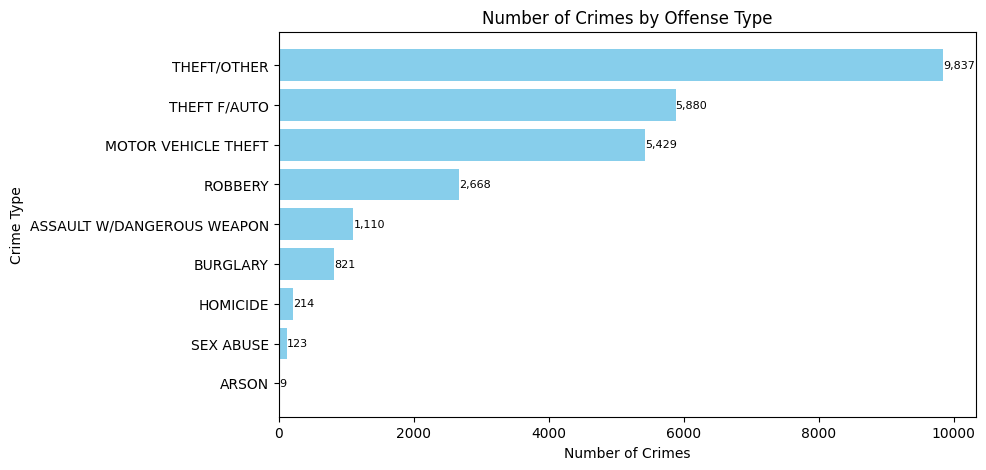

In [ ]:
# Grouping crimes by their offense type and arranging them from highest frequency to lowest frequency
crime_counts = crime_dc['offense'].value_counts().sort_values(ascending=True)

# Making a bar chart that displays the number of offenses by type
fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.barh(crime_counts.index, crime_counts.values, color='skyblue')

# Creating labels to display the counts of crime by offense type
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():,.0f}',
            va='center', ha='left', fontsize=8, color='black')

# Creating axis titles and showing the bar chart
ax.set_title('Number of Crimes by Offense Type')
ax.set_xlabel('Number of Crimes')
ax.set_ylabel('Crime Type')
plt.show()

The "Number of Crimes by Type" bar chart inidicates that "theft/other" comprises the majority of crime reports in D.C., with 9,837 reports of theft/other in 2023. On the contrary, arson was the least reported crime, with only 9 incidents of arson reported.

<h4 style="color:SlateBlue">Crimes by Ward</h4>

The amount of crime between each ward can be compared to understand how there may be geographic differences in the incidence of crime.

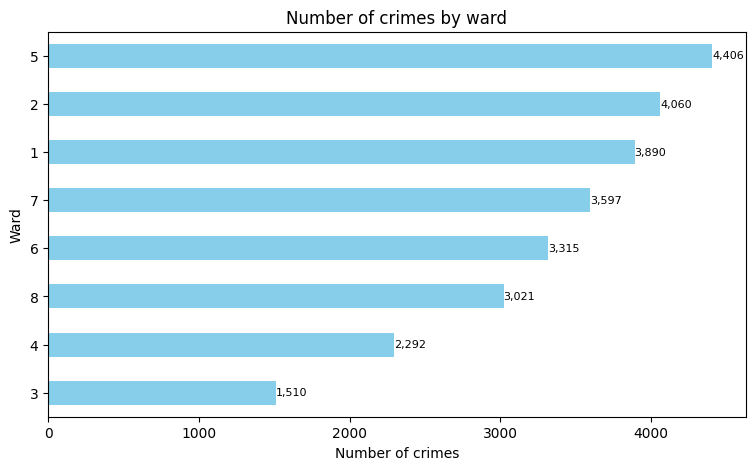

In [ ]:
# Grouping crimes by ward and arranging them from highest frequency to lowest frequency
ward_counts = crime_dc['ward'].value_counts().sort_values(ascending=True)

# Making a bar chart that displays the number of crimes by ward
plt.figure(figsize=(9, 5))
bars = ward_counts.plot(kind='barh', color='skyblue')

# Creating labels to display the counts of crime by ward
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=8, color='black')

# Creating axis titles and showing the bar chart
plt.title('Number of crimes by ward')
plt.ylabel('Ward')
plt.xlabel('Number of crimes')

plt.show()


For the number of crimes by ward, ward 5 had the most number of crimes reported (4,406), while ward 3 had the least number of crimes reported (1,510).

<h4 style="color:SlateBlue">Crimes by Police Shift</h4>

According to the dataset, there are various police shifts in which each crime was reported. The following code will provide the different police shifts.

In [ ]:
crime_dc['shift'].unique()

array(['midnight', 'day', 'evening'], dtype=object)

Based on the above output, there are 3 different police shifts: <b> midnight, day, and evening.
    
The following visualizaiton will be created to display the frequency of reported crime during each police shift.

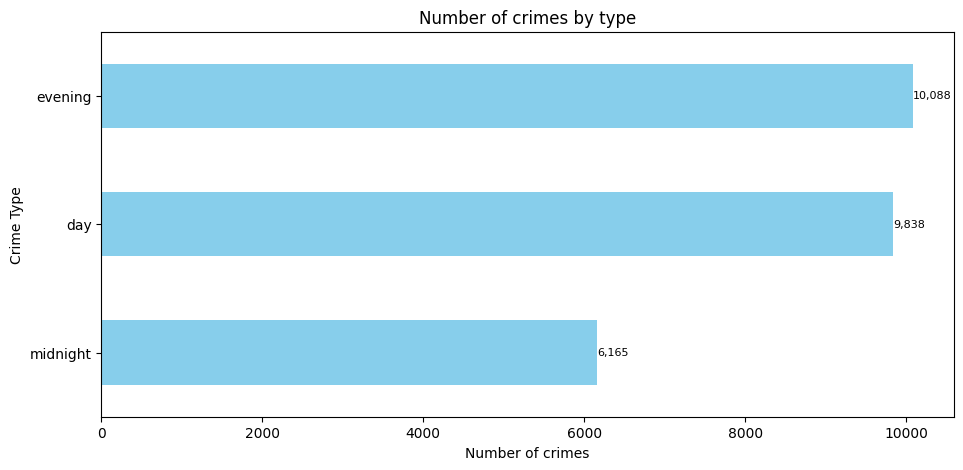

In [ ]:
# Grouping crimes by shift and arranging them from highest frequency to lowest frequency
shift_counts = crime_dc['shift'].value_counts().sort_values(ascending=True)

# Making a bar chart that displays the number of crimes by police shift
plt.figure(figsize=(11, 5))
bars = shift_counts.plot(kind='barh', color='skyblue')

# Creating labels to display the counts of crime by police shift
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=8, color='black')

# Creating axis titles and showing the bar chart
plt.title('Number of crimes by type')
plt.xlabel('Number of crimes')
plt.ylabel('Crime Type')
plt.show()


The above bar chart indicates that the majority of crimes were reported during the evening shift, while the least amount of crimes were reported during the midnight shift.

<h3 style="color:SlateBlue">Socio Economic Characterstics Dataset</h3>
The source of the socioeconomic characteristics dataset is https://opendata.dc.gov/datasets/DCGIS::acs-economic-characteristics-dc-ward/about

The dataset under investigation contains economic indicators for various wards in the District of Columbia. It offers a comprehensive view of economic factors such as income, employment rates, poverty levels, and more, enabling a detailed analysis of the region's economic landscape.

In [ ]:
socio_economic_df=pd.read_csv(r'ACS_Economic_Characteristics_DC_Ward.csv')

In [ ]:
socio_economic_df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

All the 8 rows in our dataframe are unique and do not have duplicate values.

In [ ]:
socio_economic_df.dtypes

OBJECTID         int64
GEOID            int64
NAMELSAD        object
GEONAME         object
DP03_0001E       int64
                ...   
DP03_0137PE    float64
GIS_ID          object
GLOBALID        object
SHAPEAREA        int64
SHAPELEN         int64
Length: 145, dtype: object

To identify the unique data types within the DataFrame `socio_economic_df`:-


In [ ]:
socio_economic_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

 These data types include integers (int64), floating-point numbers (float64), objects (for text or mixed data types), and more. By analyzing the unique data types, we can gain insights into the types of information and values stored within the DataFrame.

In [ ]:
socio_economic_df.isnull().sum().sum()

0

There are no null values in our socio economic dataset.

In [ ]:
print(f"There are {socio_economic_df.shape[0]} observations  and {socio_economic_df.shape[1]} variables in in the socio economic characterstic dataset")

There are 8 observations  and 145 variables in in the socio economic characterstic dataset


This dataset contains **8 rows** and **145 columns**. Rows represent specific data points, while columns cover various socio-economic factors and characteristics. The dataset offers a wealth of information for in-depth analysis, allowing us to explore patterns, trends, and relationships in the socio-economic context.

#### Unique Ward Names in Washington D.C.

Here we will explore the unique ward names found in the 'NAMELSAD' column of the `socio_economic_df` DataFrame. These ward names correspond to the geographic regions or administrative divisions in the dataset. Let's start by obtaining and displaying the unique ward names.

In [ ]:
socio_economic_df.NAMELSAD.unique()

array(['Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6',
       'Ward 7', 'Ward 8'], dtype=object)

#### Population statistics
This analysis looks at how the total population (DP03_0001E) relates to crime data. We use descriptive statistics like mean, median, and standard deviation to understand how the size of the population affects crime. Knowing this helps us calculate crime rates, distribute resources wisely, and plan effective crime prevention strategies. By combining these insights with crime data, we make informed decisions for community safety. This analysis helps policymakers understand the connection between population size and crime in a straightforward way.

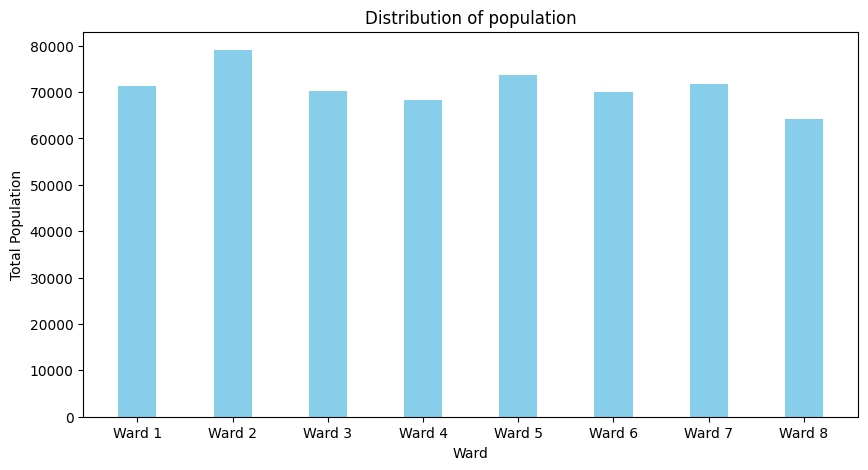

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(socio_economic_df["NAMELSAD"],socio_economic_df["DP03_0001E"], width = 0.4, color='skyblue')

plt.xlabel("Ward")
plt.ylabel("Total Population")
plt.title("Distribution of population")
plt.show()

The above visualization indicates that ward 2 has the highest total population, while ward 8 has the lowest total population.

In [ ]:
min_value=    socio_economic_df["DP03_0001E"].min()

max_value=    socio_economic_df["DP03_0001E"].max()

mean_value = socio_economic_df["DP03_0001E"].mean()

median_value = socio_economic_df["DP03_0001E"].median()

std_deviation = socio_economic_df["DP03_0001E"].std()

print(f"Mean: {mean_value:.0f}\nMedian: {median_value:.0f}\nStandard Deviation: {std_deviation:.0f}\nMinimum:{min_value:.0f}\nMaximum:{max_value:.0f}")

Mean: 71051
Median: 70786
Standard Deviation: 4293
Minimum:64107
Maximum:79049


##### Observations from descriptive statistics
The average population for all wards is about 71,050 residents, with a median of 70,786 residents, showing a balanced population distribution. The standard deviation of approximately 4293 residents, which indicates a reasonable variation in population sizes among the wards. The smallest ward has a population of 64,107 residents (in ward 8), while the largest has 79,049 residents (ward 2).

#### Unemployment Statistics
Studying unemployment alongside crime data helps us understand how joblessness relates to criminal activity.

**When people face unemployment, there might be an uptick in  crimes and some violent incidents due to mentand financial stress, idk if we can say this yet.**

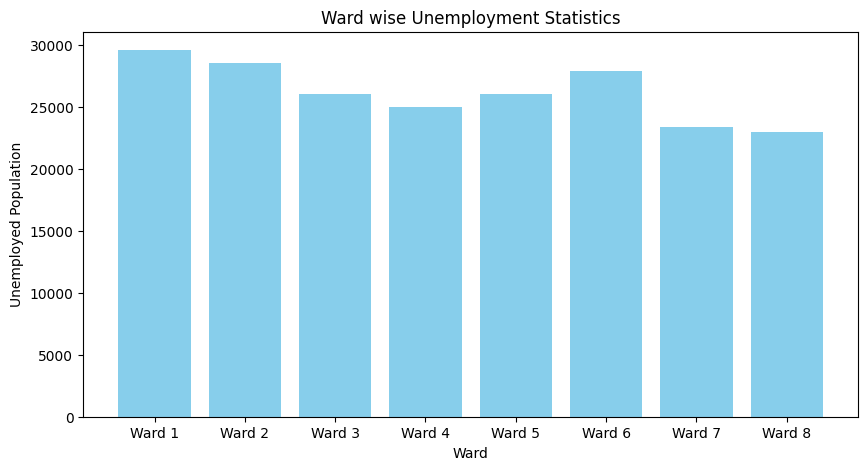

In [ ]:
fig = plt.figure(figsize = (10, 5))


# Assuming socio_economic_df["DP03_0011E"] contains the data for the y-axis and socio_economic_df["NAMELSAD"] for the x-axis labels

plt.bar(socio_economic_df["NAMELSAD"], socio_economic_df["DP03_0011E"], color='skyblue')
plt.xlabel('Ward')  # Replace 'X-axis Label' with an appropriate label for your x-axis
plt.ylabel('Unemployed Population')  # Replace 'Y-axis Label' with an appropriate label for your y-axis
plt.title('Ward wise Unemployment Statistics')  # Replace 'Bar Chart Title' with an appropriate title for your chart
plt.show()


Based on the above bar chart, Ward 1 has the highest number of unemployed residents, while Ward 8 has the lowest number of unemployed residents.

In [ ]:
min_value=    socio_economic_df["DP03_0011E"].min()

max_value=    socio_economic_df["DP03_0011E"].max()

mean_value = socio_economic_df["DP03_0011E"].mean()

median_value = socio_economic_df["DP03_0011E"].median()

std_deviation = socio_economic_df["DP03_0011E"].std()

print(f"Mean: {mean_value:.0f}\nMedian: {median_value:.0f}\nStandard Deviation: {std_deviation:.0f}\nMinimum:{min_value:.0f}\nMaximum:{max_value:.0f}")

Mean: 26159
Median: 26049
Standard Deviation: 2379
Minimum:22938
Maximum:29560


#### Observations from descriptive statistics
The average size of the unemployed population across all wards is approximately 26,159 residents, with a median of 26,049 residents. The standard deviation of approximately 2,379 indicates a moderate level of variability in unemployment rates among the wards. As demonstrated by the bar chart, the minimum unemployed population corresponds to ward 8 with 22,938 residents, while the maximum unemployed population corresponds to Ward 1 with 29,560 residents.

#### Statistics of Median Family income
Analyzing the median family income across all wards in a crime dataset is vital for understanding economic dynamics and their impact on criminal patterns.

**Lower incomes in certain areas may contribute to higher rates of  crime, as residents facing financial challenges might resort to illegal means, we can't say this yet**

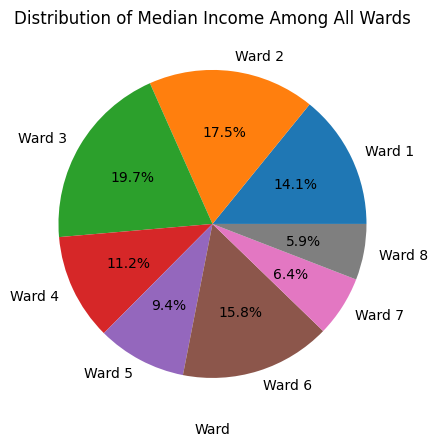

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating a piechart
plt.pie(socio_economic_df["DP03_0088E"], labels=socio_economic_df["NAMELSAD"], autopct='%1.1f%%')
plt.xlabel("Ward")
plt.title("Distribution of Median Income Among All Wards")
plt.show()

In [ ]:
min_value=    socio_economic_df["DP03_0088E"].min()

max_value=    socio_economic_df["DP03_0088E"].max()

mean_value = socio_economic_df["DP03_0088E"].mean()

median_value = socio_economic_df["DP03_0088E"].median()

std_deviation = socio_economic_df["DP03_0088E"].std()

print(f"Mean: ${mean_value:.2f}\nMedian: ${median_value:.2f}\nStandard Deviation: ${std_deviation:.2f}\nMinimum:${min_value:.2f}\nMaximum:${max_value:.2f}")

Mean: $64739.38
Median: $65583.00
Standard Deviation: $26549.79
Minimum:$30412.00
Maximum:$102050.00


#### Observations from Statistical analysis of Median Income
<p>The analysis of median income across all wards reveals a diverse economic landscape. With a mean of $64,739 and a median of $65,583, there exists significant variability, ranging from $30,412 to $102,050. This suggests notable income disparities among wards, with potential socio-economic struggles in areas below the mean.</p>

#### Statistical analysis of health insurance coverage
Analyzing the health insurance coverage of the employed population aged 19 to 64 in each ward is vital for our crime data analysis. This examination provides a holistic view of the community's well-being, linking public health and economic stability to crime rates. Healthy and economically secure individuals are generally less likely to engage in criminal activities

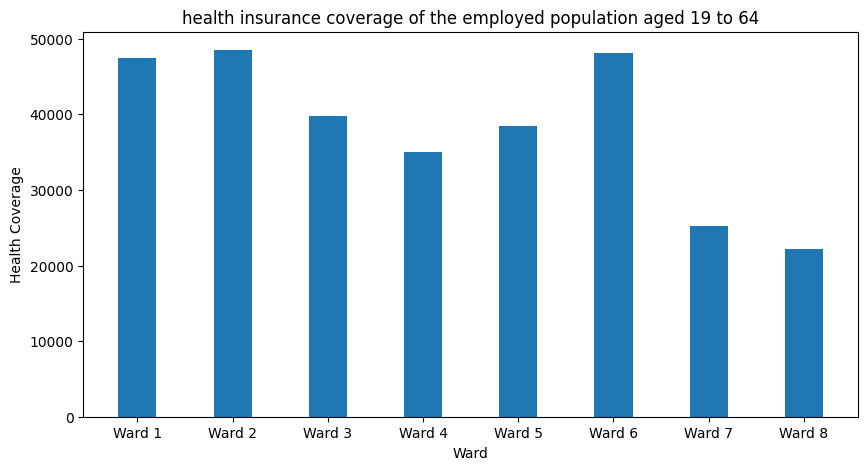

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(socio_economic_df["NAMELSAD"],socio_economic_df["DP03_0106E"], width = 0.4)

plt.xlabel("Ward")
plt.ylabel("Health Coverage")
plt.title("health insurance coverage of the employed population aged 19 to 64")
plt.show()


In [ ]:
min_value=    socio_economic_df["DP03_0106E"].min()

max_value=    socio_economic_df["DP03_0106E"].max()

mean_value = socio_economic_df["DP03_0106E"].mean()

median_value = socio_economic_df["DP03_0106E"].median()

std_deviation = socio_economic_df["DP03_0106E"].std()

print(f"Mean: {mean_value}, Median: {median_value}, Standard Deviation: {std_deviation}, Minimum:{min_value}, Maximum:{max_value}")

Mean: 38091.0, Median: 39131.0, Standard Deviation: 10205.16321700512, Minimum:22169, Maximum:48494


### Cleaning the dataset

In our crime data analysis, we have chosen specific columns, namely 'NAMELSAD,' 'DP03_0001E,' 'DP03_0011E,' 'DP03_0088E,' and 'DP03_0115E,' for exploration.
- 'NAMELSAD' is critical for identifying the legal and statistical area, providing context to crime patterns.
- 'DP03_0001E' (total population) serves as a foundational demographic metric
- 'DP03_0011E' (unemployment rate) offers insights into economic stability, a potential influencer of crime.
- 'DP03_0088E' (median family income) provides socio-economic context, aiding in understanding community prosperity or challenges.
- 'DP03_0115E' (health insurance coverage) is crucial for assessing public health aspects, influencing both crime rates and community resilience.

These selected columns collectively offer a comprehensive socio-economic overview, enabling a nuanced analysis of crime patterns and aiding in the formulation of targeted interventions and policies.

In [ ]:
li = ['NAMELSAD', 'DP03_0001E', 'DP03_0011E', 'DP03_0088E', 'DP03_0115E']
for i in socio_economic_df.columns:
    if i not in li:
        socio_economic_df.drop(columns = [i], inplace  = True)

socio_economic_df

,NAMELSAD,DP03_0001E,DP03_0011E,DP03_0088E,DP03_0115E
0,Ward 1,71298,29560,73239,6871
1,Ward 2,79049,28503,90730,13197
2,Ward 3,70274,26045,102050,8003
3,Ward 4,68236,24948,57927,7663
4,Ward 5,73628,26053,48566,10282
5,Ward 6,70025,27862,82022,6371
6,Ward 7,71788,23365,32969,11957
7,Ward 8,64107,22938,30412,11877


In [ ]:
# Renaming columns for clarity and consistency
socio_economic_df = socio_economic_df.rename(columns={
    'NAMELSAD': 'ward',
    'DP03_0001E': 'tot_pop',
    'DP03_0011E': 'unemp_rate',
    'DP03_0088E': 'Median_family_income($)',
    'DP03_0115E': 'unemp_pop_no_health_insurance_coverage'
})


In [ ]:
# Splitting the 'WARD' column based on space (' ') and creating two new columns ('New_Col' and 'WARD')
# The result is expanded into two separate columns in the DataFrame
socio_economic_df[['New_Col', 'ward']] = socio_economic_df['ward'].str.split(' ', n=1, expand=True)

In [ ]:
#converting ward to float type to maintain consistency with main dataset
socio_economic_df['ward'] = socio_economic_df['ward'].astype(int)

In [ ]:
# Dropping the temporary 'New_Col' column
# This column was created during a previous operation and is no longer needed for our analysis.
socio_economic_df = socio_economic_df.drop(columns=['New_Col'])



# Displaying the updated socio-economic DataFrame
# This shows the DataFrame after removing the 'New_Col' column.
socio_economic_df


,ward,tot_pop,unemp_rate,Median_family_income($),unemp_pop_no_health_insurance_coverage
0,1,71298,29560,73239,6871
1,2,79049,28503,90730,13197
2,3,70274,26045,102050,8003
3,4,68236,24948,57927,7663
4,5,73628,26053,48566,10282
5,6,70025,27862,82022,6371
6,7,71788,23365,32969,11957
7,8,64107,22938,30412,11877


This cleaning process significantly reduces the dimensionality of the dataset, focusing only on the key socio-economic indicators relevant to our crime data analysis. The cleaned DataFrame is now ready for further exploration and integration with the crime dataset.
This streamlined approach enhances the efficiency of our analysis and ensures that we are working with a dataset tailored to the specific needs of our crime data project.

#### Merging with crime dataset

Now that we have cleaned and processed our dataset, we can merge it with the crime dataset. Here, we are merging on 'ward' column.

In [ ]:
crime_dc = crime_dc.merge(socio_economic_df, on='ward')

In [ ]:
crime_dc.columns

Index(['neighborhood_cluster', 'offense_group', 'census_tract', 'end_date',
       'offense_text', 'shift', 'district', 'yblock', 'ward', 'offensekey',
       'sector', 'psa', 'ucr_rank', 'block_group', 'voting_precinct', 'xblock',
       'block', 'start_date', 'ccn', 'offense', 'anc', 'report_date', 'method',
       'latitude', 'longitude', 'tot_pop', 'unemp_rate',
       'Median_family_income($)', 'unemp_pop_no_health_insurance_coverage'],
      dtype='object')

Our dataset is now prepared with socioeconomic factors based on ward.

<h3 style="color:SlateBlue">Liquor Dataset</h3>


#### Loading the data
The Liquor Dataset is taken from https://opendata.dc.gov/datasets/liquor-licenses/explore

In [ ]:
liquor_data = pd.read_csv('Liquor_Licenses.csv')

### Exploratory Data Analysis (EDA)

Before we start analyzing the liquor dataset, it is important to understand the parameters of the dataset. This means understanding the variables in the dataset, the data types of the variables, and the possible values for each variable.

First, we can get an idea about the variables of the dataset by examining the dataset schema. This will show us the names of all the variables in the dataset, as well as their data types.

Once we have a good understanding of the variables in the dataset, we can start to get insights about the dataset. This can be done by performing exploratory data analysis (EDA). EDA is a process of examining the data to identify patterns, trends, and relationships. After than we can visualize the data to get insights too.

Finally, once we have a good understanding of the dataset, we can start to clean the data. This may involve removing missing values, correcting errors, and converting the data to a consistent format.

By understanding the parameters of the liquor dataset and cleaning the data before we start analyzing it, we can ensure that our analysis is accurate and meaningful.

In [ ]:
# Determine the number of liquor licesnes in DC

print(f'There are {(liquor_data.shape[0])} licenses in this DC liquor dataset.')

There are 2300 licenses in this DC liquor dataset.


#### Now we will calculate the variables present in the dataset

In [ ]:
# Determine the variables in the liquor licesnes dataset

print(f'There are {(liquor_data.shape[1])} variables in the DC liquor dataset.')

There are 41 variables in the DC liquor dataset.


#### It's time to get an idea about the variables of the dataset.

In [ ]:
# Determine the variables from the Liquor Dataset

liquor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  2300 non-null   float64
 1   Y                  2300 non-null   float64
 2   LICENSE            2300 non-null   object 
 3   APPLICANT          2300 non-null   object 
 4   TRADE_NAME         2300 non-null   object 
 5   CLASS              2300 non-null   object 
 6   ADDRESS            2300 non-null   object 
 7   ZIPCODE            2300 non-null   int64  
 8   WARD               2300 non-null   object 
 9   ANC                2300 non-null   object 
 10  SMD                2300 non-null   object 
 11  STATUS             2300 non-null   object 
 12  TYPE               2300 non-null   object 
 13  BREW_PUB           10 non-null     object 
 14  ENTERTAINMENT      747 non-null    object 
 15  SALES_CONSUMPTION  16 non-null     object 
 16  SIDEWALK_CAFE      532 n

#### Data Overview:
- Refering the above analysis, the Washington D.C. liquor license data contains 2300 entries and 41 columns. The data includes information about the liquor license holder, the type of license, the address of the establishment, and the geographic coordinates of the establishment.

#### Data Types:
- Float: X, Y, Total Capacity, Longitude, and Latitude.
- Integer: Zipcode, Mar_id, ObjectID.
- Rest all of the entries are of object datatype.

#### Geographic Information:
The data contains the following geographic information about the liquor license establishments:
- Ward
- Longitude
- Latitude

#### It's crucial to see where the licenses are distributed in Washington DC

In [ ]:
# Determine where the licenses are distributed

liquor_data['TYPE'].value_counts().sort_values(ascending = False)

Restaurant                     932
Tavern                         431
Retail - Liquor Store          217
Retail - Grocery               115
Caterer                        108
Hotel                          107
Retail-Full Service Grocery     55
Internet                        48
Wholesaler                      44
Nightclub                       42
Multipurpose                    42
Retail - Class B                37
Retail-Liquor Store             27
25 Percent                      25
Club                            22
Manufacturer                    18
Marine Vessel                   11
Beer and Wine                   10
Retail-Class B                   4
Arena                            2
Bed and Breakfast                2
Railroad                         1
Name: TYPE, dtype: int64

#### Upon looking at the above analysis,
#### Observervations:
- The most common plcaces where the liquor licences are distributed are Restaurants, followed by Tavern, and Reatail - Liquor Store.
- The top 10 places that hold liquor license account for 77% of all liquor licenses.

#### Inferences:
- There might be a strong demand for alcohol in Washinton DC as evidenced by high number of Restaurants, Reatil Stores, etc.
- The alochol market in Washington DC can be concentrated as the top 10 places holding the liquor licenses account for 77%.

#### Furthermore, we can see how many areas hold the liquor licences in Washington DC using Zipcodes

In [ ]:
# Determine the number of areas that hold liquor licences

print(f'The areas that hold liquor licences in Washington DC: {liquor_data["ZIPCODE"].nunique()}')

The areas that hold liquor licences in Washington DC: 31


#### Let's Visualize, and using that we will get to know how much licences each Ward holds

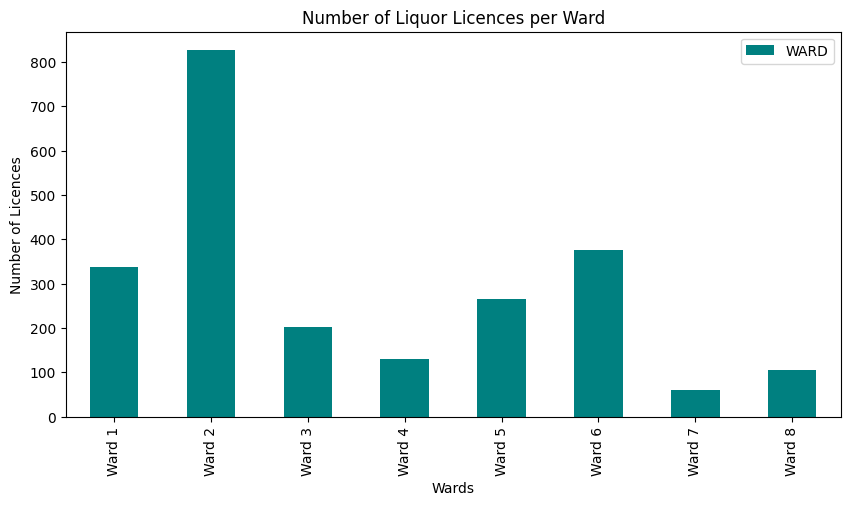

In [ ]:
# Adjust the dataframe to visualize

value_counts = liquor_data['WARD'].value_counts(ascending=True)
value_counts = value_counts.sort_index().to_frame()

# Visualize

value_counts.plot(kind='bar', y='WARD', figsize=(10, 5), color='teal')
plt.title('Number of Liquor Licences per Ward')
plt.xlabel('Wards')
plt.ylabel('Number of Licences')
plt.show()

### We can draw observations and inferences from the bar graph above:
#### Observations:
- The number of liquor licenses in Washinton DC varies significantly from ward to ward. Ward 2 has the most liquor licenses, with over 800, while Ward 7 has the fewest, with only 60.
- Number of liquor licenses in most wards is between 200 and 400 as Ward 1, 3, 4, and 5 are all within this range.
#### Inferences:
- Ward 7 maybe a residential area because there are low number of liquor licenses in this ward which suggests that there are fewer businesses that sell alcohol in this area.
- Ward 1, 2 and 6 might have a higher concentration of nightlife. The high number of liquor licenses in these wards convey that there can be a larger number of bars and clubs in these areas.

### Data Cleaning

This dataset contains information about liquor licenses in Washington DC. The data includes the type of license, the name of the license holder, the address of the establishment, and other details.

The data is in a raw format and needs to be cleaned. This involves identifying and correcting errors and inconsistencies in the data.

The primary thing to check in a dataset is to see if there are any duplicates in the dataset, if we find anything, we will drop those entries

In [ ]:
# Determine if there are any duplicates in the liquor dataset

duplicates = liquor_data.duplicated()
if duplicates.any():
    print('There are duplicate rows in Liquor dataset')
    duplicate_rows = liquor_data[duplicates]
    print(duplicate_rows)
else:
    print('There are no duplicate rows in Liquor dataset.')

There are no duplicate rows in Liquor dataset.


We did not find any duplicate values in the dataset, looks clean

#### To make the Liquor Dataset compatible with the Crimes Dataset we will update the dataframe and take neccessary columns

In [ ]:
# Filter the dataframe to make it compatible with other datasets

liquor_data = liquor_data[['APPLICANT','WARD', 'ZIPCODE', 'LONGITUDE', 'LATITUDE', 'TYPE']]
liquor_data.head()

,APPLICANT,WARD,ZIPCODE,LONGITUDE,LATITUDE,TYPE
0,R Street Restaurant Corporation,Ward 2,20009,-77.045097,38.912999,Restaurant
1,"MPE Hotel I (Washington), LLC",Ward 2,20037,-77.049070,38.904519,Hotel
2,"Lim Enterprises, Corp",Ward 2,20004,-77.031695,38.896525,Retail - Liquor Store
3,"A & M, Inc.",Ward 1,20010,-77.021168,38.936854,Retail - Class B
4,Aaron C. Dutton,Ward 2,20009,-77.045207,38.911315,Manufacturer


In [ ]:
liquor_data[['New_Col', 'WARD']] = liquor_data['WARD'].str.split(' ', n=1, expand=True)

<ipython-input-142-61914f6ef1df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liquor_data[['New_Col', 'WARD']] = liquor_data['WARD'].str.split(' ', n=1, expand=True)


In [ ]:
liquor_data.rename(columns={
    'WARD' : 'ward',
    'ZIPCODE': 'liquor_store_zip',
    'LONGITUDE': 'liquor_store_longitude',
    'LATITUDE': 'liquor_store_latitude',
    'TYPE': 'liquor_store_type'
     }, inplace=True)

<ipython-input-143-df97913c0092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liquor_data.rename(columns={


In [ ]:
# Dropping the temporary 'New_Col' column
# This column was created during a previous operation and is no longer needed for our analysis.
liquor_data = liquor_data.drop(columns=['New_Col'])

# Displaying the updated liqourdata DataFrame
liquor_data

,APPLICANT,ward,liquor_store_zip,liquor_store_longitude,liquor_store_latitude,liquor_store_type
0,R Street Restaurant Corporation,2,20009,-77.045097,38.912999,Restaurant
1,"MPE Hotel I (Washington), LLC",2,20037,-77.049070,38.904519,Hotel
2,"Lim Enterprises, Corp",2,20004,-77.031695,38.896525,Retail - Liquor Store
3,"A & M, Inc.",1,20010,-77.021168,38.936854,Retail - Class B
4,Aaron C. Dutton,2,20009,-77.045207,38.911315,Manufacturer
...,...,...,...,...,...,...
2295,"YOF Store 1, LLC",2,20001,-77.024192,38.904804,Tavern
2296,"Baja Tap DC, LLC",1,20009,-77.042650,38.921537,Tavern
2297,"Gmichael, LLC",8,20020,-76.971321,38.847586,Retail - Class B
2298,T&U LLC,2,20007,-77.059678,38.910355,Retail - Class B


The distribution of liquor stores across Washington D.C. is demonstrated in the visualization below. To better understand where these stores are located, we have chosen a dynamic map that provides the ward number of a particular store when the user hovers over the marker.

In [ ]:
mapbox_access_token = 'pk.eyJ1IjoiaGVsZ2V0MDIiLCJhIjoiY2xvb3V4NWh3MDBwbTJtcm42YzJjOGxpaiJ9.nz3MhYTSH6N8rXt6pe3rAQ'

In [ ]:
import plotly.graph_objects as go
liquor_ok = go.Scattermapbox(
        lon = liquor_data['liquor_store_longitude'],
        lat = liquor_data['liquor_store_latitude'],
        text = liquor_data['ward'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
                )
)

liquor_ok_layout = go.Layout(
        title = 'Liquor Stores in Washington D.C.',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=3
        )
    )

class_map = go.Figure(data=liquor_ok, layout=liquor_ok_layout)
class_map.show()

In [ ]:
liquor_data['ward'] = liquor_data['ward'].astype(int)

For our analysis, let's consider the types of liquor stores where primary sales is from alcohol and is retail based on the description as provided by https://abca.dc.gov/page/types-alcohol-licenses#gsc.tab=0

From the above types, let's take the below into account:

- Retail - Liquor Store
- Retail - Class B
- Beer and Wine
- Club
- Tavern
- Nightclub
- Retail-Liquor Store
- Retail-Class B

In [ ]:
liquor_stores = ['Retail - Liquor Store', 'Retail - Class B', 'Beer and Wine', 'Club', 'Tavern', 'Nightclub','Retail-Liquor Store', 'Retail-Class B']
filtered_liquor_data = liquor_data[liquor_data['liquor_store_type'].isin(liquor_stores)]
filtered_liquor_data

,APPLICANT,ward,liquor_store_zip,liquor_store_longitude,liquor_store_latitude,liquor_store_type
2,"Lim Enterprises, Corp",2,20004,-77.031695,38.896525,Retail - Liquor Store
3,"A & M, Inc.",1,20010,-77.021168,38.936854,Retail - Class B
7,"Belleva, LLC",3,20015,-77.076748,38.966269,Beer and Wine
8,National Press Club of Washington,2,20004,-77.031547,38.897019,Club
9,Don Ho Inc,2,20001,-77.026682,38.906231,Retail - Liquor Store
...,...,...,...,...,...,...
2293,"Gault Market, Inc.",7,20019,-76.945863,38.898909,Retail-Class B
2295,"YOF Store 1, LLC",2,20001,-77.024192,38.904804,Tavern
2296,"Baja Tap DC, LLC",1,20009,-77.042650,38.921537,Tavern
2297,"Gmichael, LLC",8,20020,-76.971321,38.847586,Retail - Class B


In [ ]:
liquor_store_df = filtered_liquor_data.groupby('ward').agg({'liquor_store_longitude': 'mean', 'liquor_store_latitude': 'mean', 'APPLICANT':'count'}).reset_index()
print(liquor_store_df)

   ward  liquor_store_longitude  liquor_store_latitude  APPLICANT
0     1              -77.029934              38.922323        164
1     2              -77.036612              38.905464        226
2     3              -77.074269              38.939601         37
3     4              -77.024400              38.954998         59
4     5              -76.992037              38.917495         96
5     6              -77.002342              38.892318        122
6     7              -76.947999              38.889079         40
7     8              -76.997205              38.861630         46


In [ ]:
# Rename the 'stores' column to 'store_count'
liquor_store_df = liquor_store_df.rename(columns={'APPLICANT': 'liquor_store_count'})
liquor_store_df

,ward,liquor_store_longitude,liquor_store_latitude,liquor_store_count
0,1,-77.029934,38.922323,164
1,2,-77.036612,38.905464,226
2,3,-77.074269,38.939601,37
3,4,-77.024400,38.954998,59
4,5,-76.992037,38.917495,96
5,6,-77.002342,38.892318,122
6,7,-76.947999,38.889079,40
7,8,-76.997205,38.861630,46


In [ ]:
crime_dc = crime_dc.merge(liquor_store_df, on='ward')
crime_dc.head()

,neighborhood_cluster,offense_group,census_tract,end_date,offense_text,shift,district,yblock,ward,offensekey,...,method,latitude,longitude,tot_pop,unemp_rate,Median_family_income($),unemp_pop_no_health_insurance_coverage,liquor_store_longitude,liquor_store_latitude,liquor_store_count
0,cluster 38,violent,7404.0,2023-02-24 00:00:00,HOMICIDE,midnight,7.0,131428.00,8,violent|homicide,...,gun,38.850656,-76.976591,64107,22938,30412,11877,-76.997205,38.86163,46
1,cluster 37,violent,7401.0,2023-06-20 13:36:21,ROBBERY,day,7.0,132718.00,8,violent|robbery,...,knife,38.862279,-76.994884,64107,22938,30412,11877,-76.997205,38.86163,46
2,cluster 27,property,7201.0,2023-07-03 12:41:00,THEFT/OTHER,evening,1.0,134206.00,8,property|theft/other,...,others,38.875684,-77.000553,64107,22938,30412,11877,-76.997205,38.86163,46
3,cluster 27,property,7201.0,2023-07-27 17:27:31,MOTOR VEHICLE THEFT,evening,1.0,134192.13,8,property|motor vehicle theft,...,others,38.875559,-77.005864,64107,22938,30412,11877,-76.997205,38.86163,46
4,cluster 27,property,7203.0,2023-09-20 06:30:00,THEFT F/AUTO,evening,1.0,134742.78,8,property|theft f/auto,...,others,38.880519,-77.004541,64107,22938,30412,11877,-76.997205,38.86163,46


<h3 style="color:SlateBlue">Weather Data</h3>

The dataset under consideration here, is the weather dataset for Washington DC, of the year 2023. Below we would clean and process the data and make it compatible to merge this with our main D.C crime dataset. An integration of these datasets will allow us to explore potential correlations between weather patterns, seasons and crime occurrences.

This dataset provides a detailed account of various meteorological parameters, such as maximum and minimum temperatures, average temperature, departure from normal temperature, heating and cooling degree days, precipitation, new snowfall, and snow depth. These variables, when harmonized with crime data, can unveil insightful patterns and trends that contribute to a more comprehensive understanding of the factors influencing criminal activities.

The data source is taken from:
https://www.weather.gov/wrh/Climate?wfo=lwx

In [ ]:
#Importing required libraries

import pandas as pd
weather_data = pd.read_excel(r'2023 Weather Data.xlsx', sheet_name= list(range(0,10)))

In [ ]:
weather_data[1]

,"Climatological Data for Washington Area, DC (ThreadEx) - February 2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Date,Temperature,NaN,NaN,NaN,NaN,HDD,CDD,Precipitation,New Snow,Snow Depth
1,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-01 00:00:00,41,32,36.5,-1.2,NaN,28,0,0.04,0.4,T
3,2023-02-02 00:00:00,42,31,36.5,-1.4,NaN,28,0,0,0,0
4,2023-02-03 00:00:00,41,19,30,-8,NaN,35,0,0,0,0
5,2023-02-04 00:00:00,33,16,24.5,-13.6,NaN,40,0,0,0,0
6,2023-02-05 00:00:00,59,33,46,7.8,NaN,19,0,0,0,0
7,2023-02-06 00:00:00,55,35,45,6.6,NaN,20,0,0,0,0
8,2023-02-07 00:00:00,49,31,40,1.4,NaN,25,0,0,0,0
9,2023-02-08 00:00:00,67,43,55,16.3,NaN,10,0,0,0,0


In [ ]:
#For loop used for cleaning 1st two header columns
for i in range(len(weather_data)):
    if len(weather_data[i].columns)==11:
        weather_data[i].drop(weather_data[i].columns[6], axis=1,inplace=True)
    weather_data[i]=weather_data[i].iloc[:-3]
    cols = ['Date_time','Max_Temp','Min_Temp', 'Avg', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth']
    print(weather_data[i].columns)
    weather_data[i].columns = cols
    weather_data[i] = weather_data[i][2:].reset_index(drop = True)

Index(['Climatological Data for Washington Area, DC (ThreadEx) - January 2023',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')
Index(['Climatological Data for Washington Area, DC (ThreadEx) - February 2023',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')
Index(['Climatological Data for Baltimore Area, MD (ThreadEx) - March 2023',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')
Index(['Climatological Data for Baltimore Area, MD (ThreadEx) - April 2023',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')
Index(['Climatological Data for 

In [ ]:
weather_data[3].columns

Index(['Date_time', 'Max_Temp', 'Min_Temp', 'Avg', 'Departure', 'HDD', 'CDD',
       'Precipitation', 'New Snow', 'Snow Depth'],
      dtype='object')

In [ ]:
#Concatenating individual dictionaries of dataframes monthly to come up with a dataframe having values from 2017 to 2023
weather_data_concat = pd.concat(weather_data, ignore_index=True)
weather_data_concat

,Date_time,Max_Temp,Min_Temp,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2023-01-01 00:00:00,62,42,52,13.5,13,0,0,0,0
1,2023-01-02 00:00:00,64,39,51.5,13.1,13,0,0,0,0
2,2023-01-03 00:00:00,69,49,59,20.7,6,0,T,0,0
3,2023-01-04 00:00:00,65,52,58.5,20.4,6,0,T,0,0
4,2023-01-05 00:00:00,65,49,57,19,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
296,2023-10-27 00:00:00,82,59,70.5,17.2,0,6,0,0,0
297,2023-10-28 00:00:00,85,57,71,18.1,0,6,0,0,0
298,2023-10-29 00:00:00,74,61,67.5,14.9,0,3,T,0,0
299,2023-10-30 00:00:00,81,53,67,14.7,0,2,0.14,0,0


In [ ]:
columns_to_replace_T = ['Precipitation', 'New Snow', 'Snow Depth']
for column in columns_to_replace_T:
    weather_data_concat[column] = weather_data_concat[column].replace('T', 0)

columns_to_replace_dash = ['Avg', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth']  # Add your column names here
for column in columns_to_replace_dash:
    weather_data_concat[column] = weather_data_concat[column].replace('-', 0)

weather_data_concat

,Date_time,Max_Temp,Min_Temp,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2023-01-01 00:00:00,62,42,52,13.5,13,0,0.00,0.0,0
1,2023-01-02 00:00:00,64,39,51.5,13.1,13,0,0.00,0.0,0
2,2023-01-03 00:00:00,69,49,59,20.7,6,0,0.00,0.0,0
3,2023-01-04 00:00:00,65,52,58.5,20.4,6,0,0.00,0.0,0
4,2023-01-05 00:00:00,65,49,57,19,8,0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
296,2023-10-27 00:00:00,82,59,70.5,17.2,0,6,0.00,0.0,0
297,2023-10-28 00:00:00,85,57,71,18.1,0,6,0.00,0.0,0
298,2023-10-29 00:00:00,74,61,67.5,14.9,0,3,0.00,0.0,0
299,2023-10-30 00:00:00,81,53,67,14.7,0,2,0.14,0.0,0


Our initial steps involve cleaning and standardizing the structure of the weather dataset. Specifically, we addressed discrepancies in the header columns and streamline the data format. A meticulous cleaning process is essential to ensure accurate and meaningful insights when merged with the crime dataset. Over here we replaced 'T' value with 0 since a trace value in our case would be insignificant for our data analysis to explore potential correlations between weather patterns, and crime occurrences.

### Descriptive Statistics

Some of the important terminologies to consider:

HDD: A metric used in meteorology and energy consumption analysis to quantify the demand for heating. The concept of Heating Degree Days is based on the idea that, during colder periods, buildings require heating to maintain a comfortable indoor temperature.

CDD: A metric used to quantify the demand for cooling in a specific location during warm periods. It is particularly relevant in regions where air conditioning is a significant factor in energy consumption, especially during hot weather.



### Summary of Statistics

Here's a brief summary of the key statistics for the dataset:

- **Count**: The dataset contains 331 records.
- **Average Departure**: The average departure is 2.66, ranging from -13.6 to 21.4.
- **Heating Degree Days (HDD)**: The mean HDD is 18.15, with a standard deviation of 81.51.
- **Cooling Degree Days (CDD)**: The average CDD is 12.87, with a maximum of 491.
- **Precipitation**: On average, there is 0.29 inches of precipitation, with a maximum of 6.84 inches.
- **New Snow**: The mean new snowfall is 0.02 inches, ranging up to 4.9 inches.

In summary, the data provides insights into temperature variations, heating and cooling degree days, precipitation, and snowfall over the given period. Eventually, this dataset is ready for merging with the D.C crime dataset in order to carry out further inferences on our objectives.


In [ ]:
weather_data_concat.describe()

,Precipitation,New Snow
count,301.000000,301.000000
mean,0.105947,0.001329
std,0.309041,0.023056
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.020000,0.000000
max,1.970000,0.400000


Now, we will initiate data preprocessing to allow for merging the crime and weather data sets.

The two data sets will be merged based on recorded date. Since both data sets have different column names and data types for date data, we have 3 standardizing methods to allow for merging the tables:
- Will only include date data (no time values)
- Column will be called "date"
- Values will be in datetime format

The reason to exclude time values is because the weather data set does not have recorded time values, just dates. Therefore, date data is sufficient in merging the tables.

In [ ]:
# Creating the merging column that contains date data
weather_data_concat['date'] = pd.to_datetime(weather_data_concat['Date_time'], format='%Y-%m-%d %H:%M:%S').dt.date

# Creating the matching column and converting values into date format
crime_dc['date'] = pd.to_datetime(crime_dc['start_date']).dt.date

# Merging the dataframes
crime_dc = crime_dc.merge(weather_data_concat, on='date', how='left')

# Displaying the merged dataframe
crime_dc

,neighborhood_cluster,offense_group,census_tract,end_date,offense_text,shift,district,yblock,ward,offensekey,...,Date_time,Max_Temp,Min_Temp,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,cluster 38,violent,7404.0,2023-02-24 00:00:00,HOMICIDE,midnight,7.0,131428.00,8,violent|homicide,...,2023-02-23 00:00:00,81,45,63,21.3,NaN,0,0.00,0.0,0
1,cluster 37,violent,7401.0,2023-06-20 13:36:21,ROBBERY,day,7.0,132718.00,8,violent|robbery,...,2023-06-20 00:00:00,80,70,75,0,0,10,0.00,0.0,0
2,cluster 27,property,7201.0,2023-07-03 12:41:00,THEFT/OTHER,evening,1.0,134206.00,8,property|theft/other,...,2023-07-03 00:00:00,93,74,83.5,5.7,0,19,0.47,0.0,0
3,cluster 27,property,7201.0,2023-07-27 17:27:31,MOTOR VEHICLE THEFT,evening,1.0,134192.13,8,property|motor vehicle theft,...,2023-07-27 00:00:00,97,76,86.5,8.4,0,22,0.00,0.0,0
4,cluster 27,property,7203.0,2023-09-20 06:30:00,THEFT F/AUTO,evening,1.0,134742.78,8,property|theft f/auto,...,2023-09-19 00:00:00,78,55,66.5,-1.7,0,2,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26086,cluster 15,property,1304.0,2023-02-24 07:44:00,THEFT/OTHER,day,2.0,140924.00,3,property|theft/other,...,2023-02-24 00:00:00,67,40,53.5,11.5,NaN,0,0.00,0.0,0
26087,cluster 10,property,1402.0,2023-07-27 17:10:00,THEFT/OTHER,day,2.0,143423.09,3,property|theft/other,...,2023-07-27 00:00:00,97,76,86.5,8.4,0,22,0.00,0.0,0
26088,cluster 14,property,400.0,2023-08-01 00:01:00,THEFT F/AUTO,day,2.0,139731.73,3,property|theft f/auto,...,2023-07-31 00:00:00,86,66,76,-1.8,0,11,0.00,0.0,0
26089,cluster 15,property,1304.0,2023-09-15 10:50:00,THEFT/OTHER,day,2.0,140924.90,3,property|theft/other,...,2023-09-15 00:00:00,78,58,68,-1.7,0,3,0.00,0.0,0


In [ ]:
# Dropping columns that data that
#weather_data_concat.drop(['Date_time', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth'], axis=1, inplace=True)

1. Are there specific geographic hotspots for crime in Washington DC?
2. Is there a correlation between the density of alcohol outlets and violent crime rates in DC?
3. Can we predict future crime rates or hotspots based on historical data and identified patterns?
4. Does the temperature of the day have an impact on the number of crimes?
5. How do socioeconomic factors such as income levels, unemployment rates, and education levels correlate with crime rates in different areas of Washington DC?
6. Is there an association between the time of day a crime that a crime occurred and the type of crime?


In [ ]:
crime_dc.columns

Index(['neighborhood_cluster', 'offense_group', 'census_tract', 'end_date',
       'offense_text', 'shift', 'district', 'yblock', 'ward', 'offensekey',
       'sector', 'psa', 'ucr_rank', 'block_group', 'voting_precinct', 'xblock',
       'block', 'start_date', 'ccn', 'offense', 'anc', 'report_date', 'method',
       'latitude', 'longitude', 'tot_pop', 'unemp_rate',
       'Median_family_income($)', 'unemp_pop_no_health_insurance_coverage',
       'liquor_store_longitude', 'liquor_store_latitude', 'liquor_store_count',
       'date', 'Date_time', 'Max_Temp', 'Min_Temp', 'Avg', 'Departure', 'HDD',
       'CDD', 'Precipitation', 'New Snow', 'Snow Depth'],
      dtype='object')

In [ ]:
crime_dc['ward'].value_counts()

5    4406
2    4060
1    3890
7    3597
6    3315
8    3021
4    2292
3    1510
Name: ward, dtype: int64

In [ ]:
#liquor_data=liquor_data.groupby('ward')['APPLICANT'].count().reset_index(drop=False)

In [ ]:
#liquor_data.columns

In [ ]:
#liquor_data

In [ ]:
#crime_dc = crime_dc.merge(liquor_data, on='ward', how='left')
#crime_dc

# Visualization

### 1. Are there specific geographic hotspots for crime in Washington DC?

### Interactive Map Version

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
# Create a map centered around an average location in Washington DC
dc_map = folium.Map(location=[crime_dc['latitude'].mean(), crime_dc['longitude'].mean()], zoom_start=11)

# Prepare data for the heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in crime_dc.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(dc_map)

# Diaplay the map
dc_map

### Static Map Version

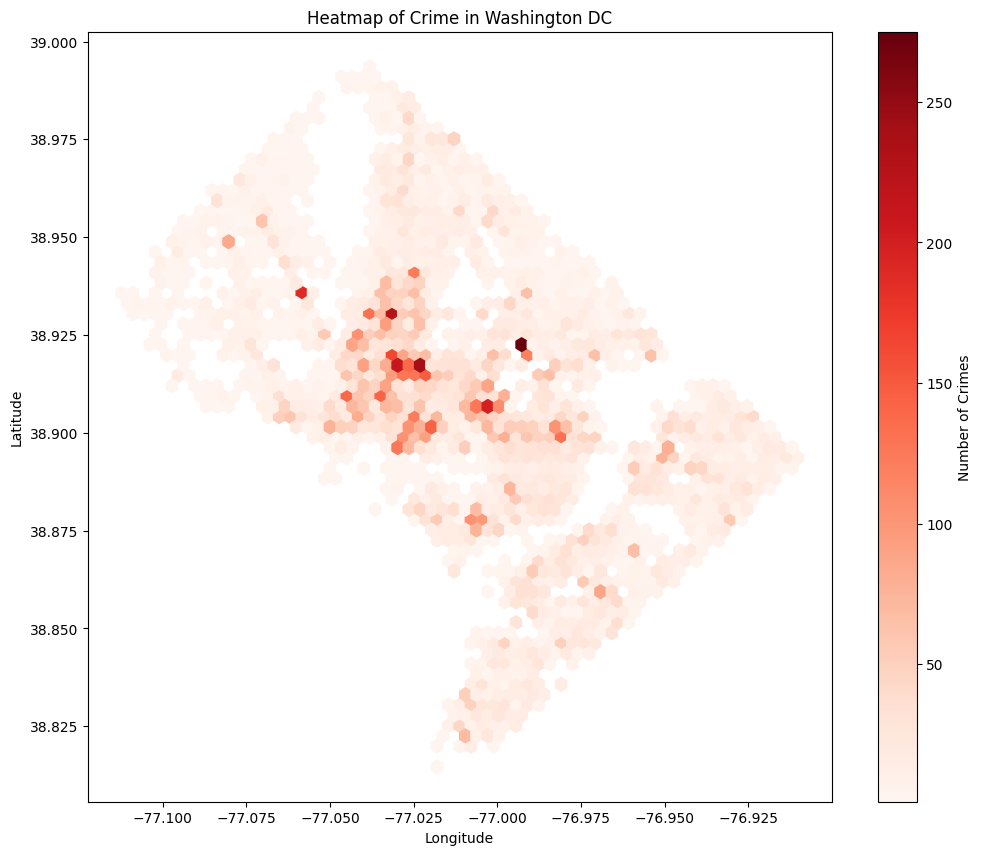

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since we are dealing with geographic data, we use a scatter plot with a density overlay
plt.figure(figsize=(12, 10))

# Using hexbin for a heatmap-like effect
plt.hexbin(crime_dc['longitude'], crime_dc['latitude'], gridsize=60, cmap='Reds', mincnt=1)

# Adding a color bar
plt.colorbar(label='Number of Crimes')

# Setting labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Crime in Washington DC')

# Show the plot
plt.show()

In [ ]:
filtered_crime_and_liquor = crime_dc[['ward', 'liquor_store_longitude', 'liquor_store_latitude']]

#filtered_crime_and_liquor.loc[filtered_crime_and_liquor['ward'] == 8]

#filtered_crime_and_liquor['ward'].unique()

filtered_crime_and_liquor

,ward,liquor_store_longitude,liquor_store_latitude
0,8,-76.997205,38.861630
1,8,-76.997205,38.861630
2,8,-76.997205,38.861630
3,8,-76.997205,38.861630
4,8,-76.997205,38.861630
...,...,...,...
26086,3,-77.074269,38.939601
26087,3,-77.074269,38.939601
26088,3,-77.074269,38.939601
26089,3,-77.074269,38.939601


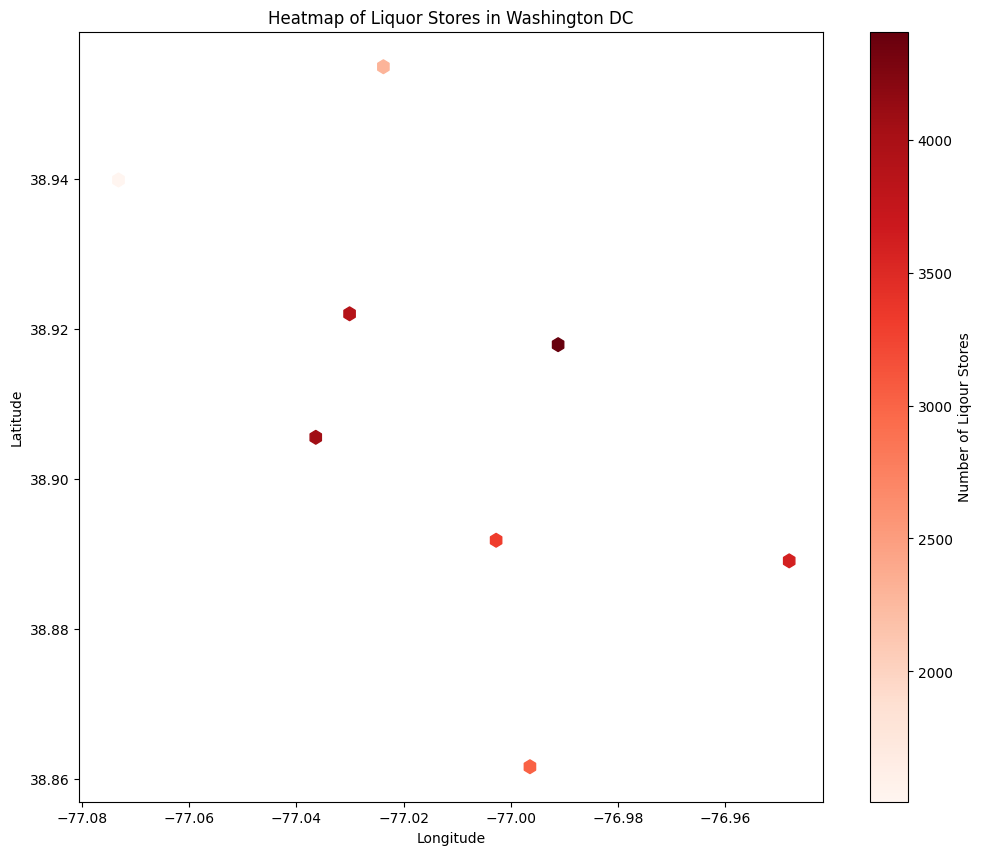

In [ ]:
plt.figure(figsize=(12, 10))

# Using hexbin for a heatmap-like effect
plt.hexbin(filtered_crime_and_liquor['liquor_store_longitude'], filtered_crime_and_liquor['liquor_store_latitude'], gridsize=60, cmap='Reds', mincnt=1)

# Adding a color bar
plt.colorbar(label='Number of Liqour Stores')

# Setting labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Liquor Stores in Washington DC')

# Show the plot
plt.show()

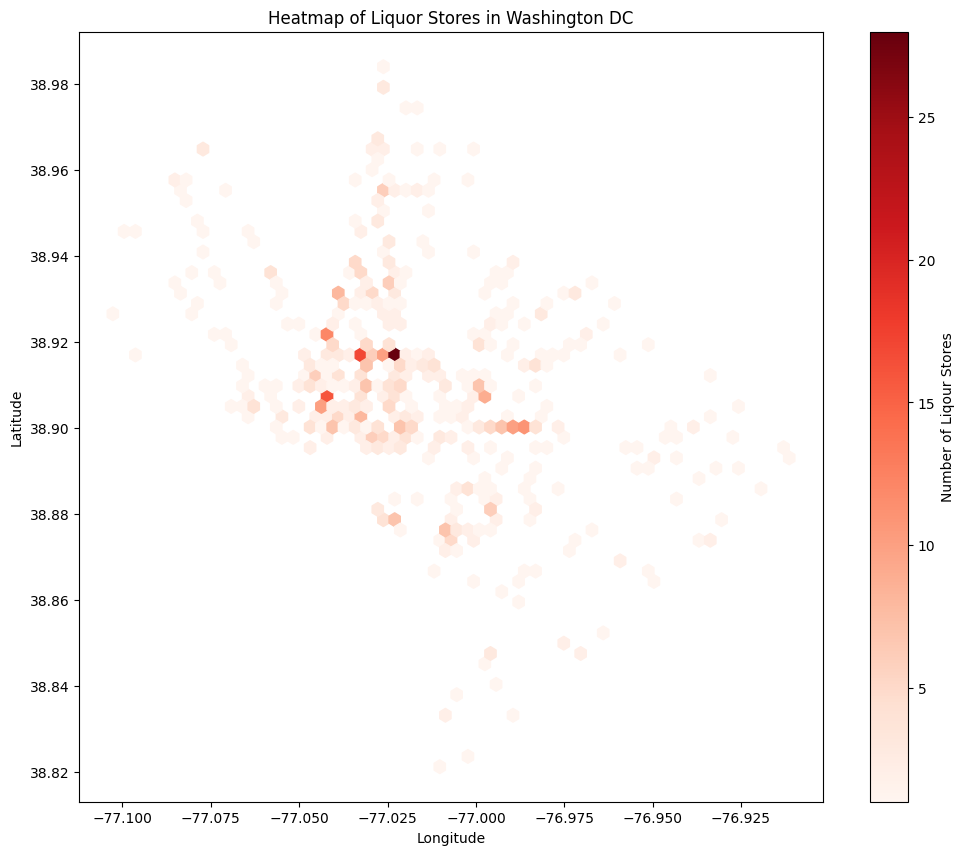

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since we are dealing with geographic data, we use a scatter plot with a density overlay
plt.figure(figsize=(12, 10))

# Using hexbin for a heatmap-like effect
plt.hexbin(filtered_liquor_data['liquor_store_longitude'], filtered_liquor_data['liquor_store_latitude'], gridsize=60, cmap='Reds', mincnt=1)

# Adding a color bar
plt.colorbar(label='Number of Liqour Stores')

# Setting labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Liquor Stores in Washington DC')

# Show the plot
plt.show()

In [ ]:
mapbox_access_token = 'pk.eyJ1IjoiaGVsZ2V0MDIiLCJhIjoiY2xvb3V4NWh3MDBwbTJtcm42YzJjOGxpaiJ9.nz3MhYTSH6N8rXt6pe3rAQ'

In [ ]:
import plotly.graph_objects as go
liquor_and_crime = go.Scattermapbox(
        lon = filtered_crime_and_liquor['liquor_store_longitude'],
        lat = filtered_crime_and_liquor['liquor_store_latitude'],
        text = filtered_crime_and_liquor['ward'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
                )
)

liquor_and_crime_layout = go.Layout(
        title = 'Class Hometowns (Sample)',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=3
        )
    )

class_map = go.Figure(data=liquor_and_crime, layout=liquor_and_crime_layout)
class_map.show()

### 2. Is there a correlation between the density of alcohol outlets and violent crime rates in DC?

5) How do socioeconomic factors such as income levels and unemployment rates correlate with crime rates in different areas of Washington DC?

**Exploring the Nexus:**

Socioeconomic Factors and Crime Rates in Washington, DC Washington, DC, a city steeped in history and culture, presents a complex urban landscape where various socioeconomic factors intertwine with the dynamics of crime. In this analysis, we delve into the intricate relationship between income levels, unemployment rates, education levels, and crime rates across different wards in the nation's capital.

Understanding the interplay of these factors is crucial not only for policy-makers and urban planners but also for the residents seeking a safer and more prosperous community. By unraveling the patterns and correlations, we aim to shed light on the multifaceted nature of crime in Washington, DC, and explore how socioeconomic conditions may contribute to, or mitigate, crime across various neighborhoods.

As we embark on this analytical journey, we will employ data-driven insights and visualizations to uncover the nuanced connections between socioeconomic indicators and crime rates.

**Exploring Socioeconomic Factors and Crime Rates in Washington, DC**

In this analysis, we aim to explore the intricate relationship between socioeconomic factors and crime rates across different wards in Washington, DC. By merging crime and socioeconomic datasets and employing visualizations, we seek to uncover patterns and correlations that contribute to a deeper understanding of the dynamics at play.

**Data Merging**

We begin by merging crime and socioeconomic data using the ward as a common identifier

**Correlation Analysis**

Next, we perform a correlation analysis using Seaborn to understand the relationship between key socioeconomic indicators and crime rates.


In [ ]:
crimes_by_ward=crime_dc.groupby('ward')['offense'].count().reset_index()
num_bins = 5

# Create bins using cut with specified number of bins
crime_dc['income_bins'] = pd.cut(crime_dc['Median_family_income($)'], bins=num_bins)

# Group by bins and offense, then count occurrences
result = crime_dc.groupby(['income_bins']).size().reset_index(name='count')

# Display the result
print(result)
result['mid']=result['income_bins'].apply(lambda x : (x.left + x.right)/2)
correlation = result['mid'].corr(result['count'])
print(correlation)
unemp_by_ward = crime_dc.groupby('ward')['unemp_rate'].mean().reset_index()
unemp_by_ward=unemp_by_ward.merge(crimes_by_ward,left_on='ward', right_on='ward', how='left')
correlation = unemp_by_ward['unemp_rate'].corr(unemp_by_ward['offense'])
print(correlation)
no_insurance = crime_dc.groupby('ward')['unemp_pop_no_health_insurance_coverage','income_bins'].mean().reset_index()
no_insurance=no_insurance.merge(crimes_by_ward,left_on='ward', right_on='ward', how='left')
correlation = no_insurance['unemp_pop_no_health_insurance_coverage'].corr(no_insurance['offense'])
print(correlation)
crime_dc.columns

            income_bins  count
0  (30340.362, 44739.6]   6618
1    (44739.6, 59067.2]   6698
2    (59067.2, 73394.8]   3890
3    (73394.8, 87722.4]   3315
4   (87722.4, 102050.0]   5570
-0.5575562624344303
0.322774289793836
0.37657941908142606


<ipython-input-175-2a84a5d9d8f6>:19: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-175-2a84a5d9d8f6>:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Index(['neighborhood_cluster', 'offense_group', 'census_tract', 'end_date',
       'offense_text', 'shift', 'district', 'yblock', 'ward', 'offensekey',
       'sector', 'psa', 'ucr_rank', 'block_group', 'voting_precinct', 'xblock',
       'block', 'start_date', 'ccn', 'offense', 'anc', 'report_date', 'method',
       'latitude', 'longitude', 'tot_pop', 'unemp_rate',
       'Median_family_income($)', 'unemp_pop_no_health_insurance_coverage',
       'liquor_store_longitude', 'liquor_store_latitude', 'liquor_store_count',
       'date', 'Date_time', 'Max_Temp', 'Min_Temp', 'Avg', 'Departure', 'HDD',
       'CDD', 'Precipitation', 'New Snow', 'Snow Depth', 'income_bins'],
      dtype='object')

##Geographic Visualization

To visualize our findings geographically, we employ Geopandas and Plotly Express. We load ward boundaries or centroids, calculate central coordinates, and merge the data.

## Interactive Map

Finally, we create an interactive map using Plotly Express, displaying the relationship between median income, crime rates, and ward locations


In [197]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

# Load crime data
visual = crime_dc.groupby('ward')['unemp_pop_no_health_insurance_coverage', 'Median_family_income($)', 'unemp_rate'].mean().reset_index()
visual = visual.merge(crimes_by_ward, left_on='ward', right_on='ward', how='left')

# Load geographic data
file_path = 'Wards_from_2012.shp'
gdf = gpd.read_file(file_path)

# Calculate centroid coordinates
gdf['centroid'] = gdf['geometry'].centroid
gdf['centroid_lat'] = gdf['centroid'].y
gdf['centroid_lon'] = gdf['centroid'].x

# Assign ward numbers
gdf['ward'] = gdf.index + 1
print(gdf[['ward', 'centroid_lat', 'centroid_lon']])

# Merge geographic data with crime data
visual = visual.merge(gdf, left_on='ward', right_on='ward', how='left')

# Mapbox token for Mapbox API access
mapbox_token = 'pk.eyJ1Ijoic3NoaXZhbSIsImEiOiJjbHA0cnJ0cXoxNm5iMmlvYjhxcnFjZm10In0.miOfR0N1V4R8yE7OLBYglw'

# Create scatter map using Plotly Express
fig = px.scatter_mapbox(
    visual,
    lat='centroid_lat',
    lon='centroid_lon',
    color='ward',
    size='offense',
    hover_data=['ward', 'Median_family_income($)', 'offense'],
    title='Median Income per Ward vs Crime Rate',
    labels={'Median_family_income($)': 'Median Income', 'offense': 'Crime Rate'},
    size_max=15,  # Adjust the maximum size of the bubbles
    mapbox_style='open-street-map',  # You can choose a different map style
    zoom=11,  # Adjust the initial zoom level
    center=dict(lat=38.9174, lon=-77.0310)  # Set the initial center of the map (average values for Washington D.C.)
)

# Update layout with Mapbox access token
fig.update_layout(mapbox=dict(accesstoken=mapbox_token))

# Display the interactive map
fig.show()


   ward  centroid_lat  centroid_lon
0     1     38.886807    -77.002771
1     2     38.840209    -77.006588
2     3     38.963836    -77.034146
3     4     38.936375    -77.078987
4     5     38.925437    -76.985476
5     6     38.925526    -77.031423
6     7     38.893233    -77.043304
7     8     38.886989    -76.947842


<ipython-input-197-df434fd48b61>:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [215]:
# Import the necessary library
import pandas as pd

# Convert 'report_date' to datetime format
crime_dc['report_date'] = pd.to_datetime(crime_dc['report_date'])

# Extract month and year from 'report_date'
crime_dc['month'] = crime_dc['report_date'].dt.month
crime_dc['year'] = crime_dc['report_date'].dt.year
crime_dc['week'] = crime_dc['report_date'].dt.isocalendar().week
# Group data by 'ward', 'year', and 'month', and aggregate relevant statistics
grouped_data = crime_dc.groupby(['ward', 'year', 'month']).agg({
    'offense': 'count',      # Count the number of offenses
    'latitude': 'mean',      # Mean latitude
    'longitude': 'mean'      # Mean longitude
}).reset_index()
grouped_data
# grouped_data[grouped_data['ward']==5]

,ward,year,month,offense,latitude,longitude
0,1,2023,1,372,38.922759,-77.030622
1,1,2023,2,399,38.923241,-77.031128
2,1,2023,3,340,38.923740,-77.030967
3,1,2023,4,385,38.923246,-77.030556
4,1,2023,5,442,38.923766,-77.031474
...,...,...,...,...,...,...
75,8,2023,6,356,38.851020,-76.990111
76,8,2023,7,353,38.852799,-76.990776
77,8,2023,8,391,38.851005,-76.991276
78,8,2023,9,317,38.851589,-76.992197


# Enhancing Community Safety with Predictive Crime Analysis

In Washington, DC, we're using data analysis to make neighborhoods safer. Our project predicts crime in different areas, helping the police and city leaders make better decisions.

**Making Policing Smarter**

Our system finds areas with more crime, so police can focus there. This helps them be proactive, responding faster to keep everyone safe.

**Stopping Crime Before It Happens**
We use the data to stop crime before it even starts. By knowing where crime might happen, we can take steps to prevent it. This means a safer city for all of us.

**Giving Power to the People**

People living and working in DC can now make informed choices. They know where it's safer and can work with the police to keep their communities secure.

**Better Rules for Each Neighborhood**

Our insights help city leaders create rules that fit each neighborhood. This way, policies are more effective because they're made with each community in mind.

**Faster Help in Emergencies**

Our system helps emergency services know where they might be needed most. This means they can respond quickly and help people faster in areas where crime is more likely.

**Smart Decision-Making with Data**

We find hidden patterns in the data, helping leaders make better choices. This way, decisions are based on facts, making our strategies more effective.

**Everyone Plays a Role**

Talking openly about crime and how to prevent it gets everyone involved. When the community and the police work together, we make our neighborhoods safer for everyone.

In nutshell, our project levarages data to make smart choices and build a safer future for Washington, DC.


In [220]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Define the feature columns for the model
feature_columns = ['latitude', 'longitude', 'year', 'month']

# Extract features (X) and target variable (y) from the grouped_data DataFrame
X = grouped_data[feature_columns]
y = grouped_data['offense']

# Display the selected feature columns
print(grouped_data[feature_columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Create a DataFrame for prediction with new data
data_for_prediction = pd.DataFrame()
data_for_prediction[['latitude', 'longitude']] = gdf[['centroid_lat', 'centroid_lon']]
data_for_prediction['year'] = 2024
data_for_prediction['month'] = 1
# data_for_prediction['week'] = 1
# Standardize the new data
new_data_scaled = scaler.transform(data_for_prediction[feature_columns])

# Make predictions on the new data
predictions = model.predict(new_data_scaled)

# Round up the predicted number of offenses and update the DataFrame
data_for_prediction['predicted_num_offenses'] = predictions
data_for_prediction['predicted_num_offenses'] = data_for_prediction['predicted_num_offenses'].apply(np.ceil)

# Display the DataFrame with predictions
print(data_for_prediction)


     latitude  longitude  year  month
0   38.922759 -77.030622  2023      1
1   38.923241 -77.031128  2023      2
2   38.923740 -77.030967  2023      3
3   38.923246 -77.030556  2023      4
4   38.923766 -77.031474  2023      5
..        ...        ...   ...    ...
75  38.851020 -76.990111  2023      6
76  38.852799 -76.990776  2023      7
77  38.851005 -76.991276  2023      8
78  38.851589 -76.992197  2023      9
79  38.854952 -76.992217  2023     10

[80 rows x 4 columns]
Mean Squared Error: 549.5760874999999
    latitude  longitude  year  month  predicted_num_offenses
0  38.886807 -77.002771  2024      1                   313.0
1  38.840209 -77.006588  2024      1                   315.0
2  38.963836 -77.034146  2024      1                   250.0
3  38.936375 -77.078987  2024      1                   146.0
4  38.925437 -76.985476  2024      1                   380.0
5  38.925526 -77.031423  2024      1                   350.0
6  38.893233 -77.043304  2024      1                   3

##Results

The predictions are for a specific month (January 2024), which allows for temporal analysis. Understanding monthly variations in crime rates can help authorities anticipate and respond to seasonal trends or events that may influence criminal activity.

In concluding our data analysis  on predicting crimes in January 2024, we find assurance in the moderately low Mean Squared Error (MSE) of 549.58. While our model currently provides reasonably accurate predictions based on features such as latitude, longitude, year, and month, we acknowledge the inherent uncertainties in forecasting complex phenomena like crime. The moderate MSE signals room for improvement, and we recognize the potential for refining our model with more extensive training data.

As we move forward, our commitment lies in continuous enhancement. Obtaining additional data will be pivotal in strengthening the model's predictive capabilities, fostering a more nuanced understanding of the factors influencing crime rates.

This underscores the iterative nature of our project, where ongoing refinement is key to delivering more accurate and insightful predictions for effective decision-making in the realm of public safety.




